## Explore Supervised Machine Learning : Linear Regression
<font color=cian><b><i>Linear regression is a common Statistical Data Analysis technique. It is used to determine the extent to which there is a linear relationship between a dependent variable and one or more independent variables.</i></b></font>

### **Problem Statement**
<font color=cian><b><i>In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.
Data can be found at http://bit.ly/w-data
What will be predicted score if a student study for 9.25 hrs in a
day?</i></b></font>

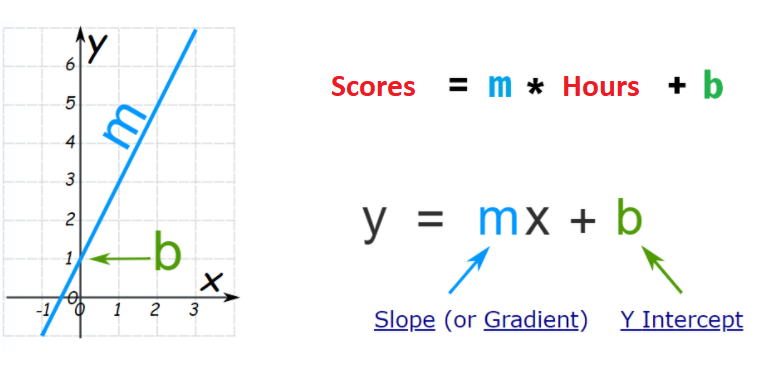


### **Simple Linear Regression Prediction**

    Actual	Predicted
    ------  ---------
        17	13.160373

    	30	28.816056

    	62	60.127422

    	21	26.859096
        
**Mean Absolute Error: 3.188811175202192**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
# Reading data from given link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Checking Null-values & Data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


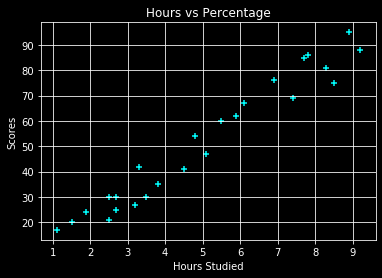

In [4]:
# Plotting the distribution of scores based on studying hours

plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores')  

plt.scatter(df.Hours,df.Scores,color='cyan',marker='+')
plt.grid()

In [5]:
# Assigning the feature and the label
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [6]:
# Splitting the data into  train & test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state=60) 

In [7]:
# Creating linear regression object
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

#Printing the slope and the intercept
print("Slope: {}".format(regressor.coef_))
print("Intercept: [{}]".format(regressor.intercept_))

Slope: [9.78480185]
Intercept: [2.39709099118037]


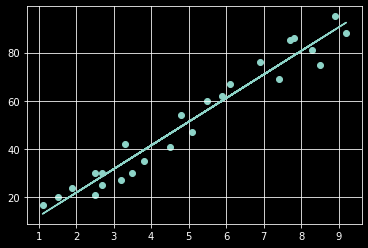

In [8]:
# Plotting the regression line
l = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, l);
plt.grid()

In [9]:
# Testing data
print(X_test)
# Predicting the scores
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.1]
 [2.7]
 [5.9]
 [2.5]]


In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})  
df 

,Actual Scores,Predicted Scores
0,17,13.160373
1,30,28.816056
2,62,60.127422
3,21,26.859096


In [11]:
# Measuring the error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.188811175202192


In [12]:
# Predicted score if a student study for 9.25 hrs in a day
hours = 9.25
test_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(test_pred[0]))

No of Hours = 9.25
Predicted Score = 92.90650809960843
